In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
x,x_time,y,y_time = [],[],[],[]

In [4]:
import os
%cd "/content/drive/MyDrive/TerrainIdentificationForTimeSeriesData"

/content/drive/MyDrive/TerrainIdentificationForTimeSeriesData


In [2]:
import os

path = "TrainingData"

files = os.listdir(path)

x_csv = []
x_time_csv = []
y_csv = []
y_time_csv = []

for file in files:
    if file.endswith("_x.csv"):
        x_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_x_time.csv"):
        x_time_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y.csv"):
        y_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y_time.csv"):
        y_time_csv.append(pd.read_csv(path+"/"+file,header = None))


In [3]:
for i in range(29):
    print(len(x_csv[i]),4*len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [4]:
l = []
for j in range(29):
    new_list = []
    for i in (y_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))


y_csv = l
l = []
for j in range(29):
    new_list = []
    for i in (y_time_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))
y_time_csv = l


In [5]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37892
70172 70172
43146 43148
54956 54956
59121 59120
38631 38632
31423 31424
66762 66764
55999 56000
55401 55400
48797 48796
51461 51460
42319 42320
36313 36312
47210 47212
19533 19532
34309 34308
34476 34476
56079 56080
34519 34520
44905 44904
48125 48124
59562 59564
45129 45128
46201 46200
46989 46988
44641 44640
39439 39440
48138 48140


In [6]:
for i in range(29):
    if len(x_csv[i])>len(y_csv[i]):
        x_csv[i] = x_csv[i].drop(x_csv[i].iloc[-(len(x_csv[i])-len(y_csv[i])):].index)
        x_time_csv[i] = x_time_csv[i].drop(x_time_csv[i].iloc[-(len(x_time_csv[i])-len(y_csv[i])):].index)
    elif len(x_csv[i])<len(y_csv[i]):
        y_csv[i] = y_csv[i].drop(y_csv[i].iloc[-(len(y_csv[i])-len(x_csv[i])):].index)
        y_time_csv[i] = y_time_csv[i].drop(y_time_csv[i].iloc[-(len(y_time_csv[i])-len(x_csv[i])):].index)

In [7]:
for i in range(29):
    print(len(x_csv[i]),len(y_csv[i]))

37890 37890
70172 70172
43146 43146
54956 54956
59120 59120
38631 38631
31423 31423
66762 66762
55999 55999
55400 55400
48796 48796
51460 51460
42319 42319
36312 36312
47210 47210
19532 19532
34308 34308
34476 34476
56079 56079
34519 34519
44904 44904
48124 48124
59562 59562
45128 45128
46200 46200
46988 46988
44640 44640
39439 39439
48138 48138


In [8]:
for df in x_csv:
    df.set_axis(["1","2","3","4","5","6"], axis=1, inplace=True)
x = pd.concat(x_csv).reset_index(drop=True)

In [9]:
for df in y_csv:
    df.set_axis(["Y"], axis=1, inplace=True)
y = pd.concat(y_csv).reset_index(drop=True)

In [10]:
x,y

(                1         2         3         4         5         6
 0        4.435275  8.196063  2.974488  0.014215 -0.039157 -0.016744
 1        4.186920  8.344455  2.908057  0.005771 -0.004480 -0.003345
 2        4.544637  8.408659  2.890000  0.007967  0.022412  0.001159
 3        4.849308  8.411614  2.900692  0.027778 -0.010670 -0.014223
 4        4.509190  8.118649  2.847298  0.021577 -0.045498 -0.021111
 ...           ...       ...       ...       ...       ...       ...
 1341628  2.072244  8.908878 -3.500000  0.001351  0.001191  0.001031
 1341629  2.085123  8.915123 -3.520000  0.001918 -0.001147  0.000000
 1341630  2.083774  8.910000 -3.538981 -0.002015 -0.004099  0.001042
 1341631  2.111447  8.908553 -3.535724  0.000183 -0.001673  0.001856
 1341632  2.087730  8.900000 -3.518865  0.000052 -0.001267  0.000000
 
 [1341633 rows x 6 columns],
          Y
 0        0
 1        0
 2        0
 3        0
 4        0
 ...     ..
 1341628  0
 1341629  0
 1341630  0
 1341631  0
 1341632 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [13]:
x

array([[ 6.63865175e-01,  2.36377136e-02, -5.55171281e-01,
         2.97532289e-03, -4.04391253e-02,  6.60469158e-02],
       [ 6.20544908e-01,  4.52871459e-02, -5.67085160e-01,
         3.50743557e-04, -1.82720185e-02,  8.34568144e-02],
       [ 6.82941059e-01,  5.46540939e-02, -5.70323541e-01,
         1.03347841e-03, -1.08201851e-03,  8.93083295e-02],
       ...,
       [ 2.53695656e-01,  1.27796501e-01, -1.72331088e+00,
        -2.06917290e-03, -1.80290443e-02,  8.91570716e-02],
       [ 2.58522624e-01,  1.27585393e-01, -1.72272676e+00,
        -1.38591095e-03, -1.64778319e-02,  9.02144711e-02],
       [ 2.54385696e-01,  1.26337565e-01, -1.71970323e+00,
        -1.42671538e-03, -1.62182484e-02,  8.78030474e-02]])

In [14]:
x = pd.DataFrame(x,columns = ["1","2","3","4","5","6"])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x['y'] = y

In [17]:
x.drop(['y'],inplace=True,axis=1)

In [18]:
y.value_counts()

Y
0    1006913
3     206436
2      73068
1      55216
dtype: int64

In [19]:
!pip install imblearn

In [20]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)


In [21]:
y_resampled.value_counts()


Y
0    1006913
1    1006913
2    1006913
3    1006913
dtype: int64

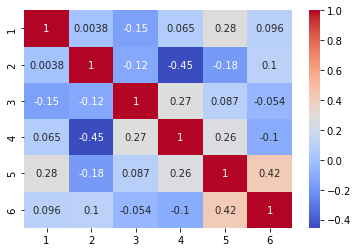

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample correlation matrix
corr_matrix = x.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [23]:
X_resampled['y'] = y_resampled

In [24]:
X_resampled

,1,2,3,4,5,6,y
0,0.663865,0.023638,-0.555171,0.002975,-0.040439,0.066047,0
1,0.620545,0.045287,-0.567085,0.000351,-0.018272,0.083457,0
2,0.682941,0.054654,-0.570324,0.001033,-0.001082,0.089308,0
3,0.736084,0.055085,-0.568406,0.007191,-0.022229,0.069323,0
4,0.676758,0.012344,-0.577982,0.005263,-0.044493,0.060373,0
...,...,...,...,...,...,...,...
4027647,0.725862,0.374254,-0.600192,-0.970825,0.141854,0.548421,3
4027648,-0.366764,4.206930,-0.799234,-1.002175,0.646043,-1.168881,3
4027649,-1.233645,0.765207,-1.052268,-0.143772,-0.474352,-0.519159,3
4027650,-0.389329,0.560887,-0.235594,-0.445080,-0.577364,-0.239120,3


In [25]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled.drop('y',axis=1), X_resampled['y'], test_size=0.3, random_state=42, stratify=X_resampled['y'])

In [26]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython import embed
from imblearn.over_sampling import SMOTE 
from sklearn.tree import plot_tree
from collections import Counter
import pickle

In [27]:
sm = SMOTE(random_state=23)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print(len(x_train_sm), len(y_train_sm))

county_sm = Counter(y_train_sm)
print(county_sm)

2819356 2819356
Counter({2: 704839, 1: 704839, 3: 704839, 0: 704839})


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
def one_hot_encoding(labels):
    encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    encoder = encoder.fit(labels)
    training_y_encoded = encoder.transform(labels)
    return training_y_encoded

In [29]:
training_y_encoded = one_hot_encoding(np.array(y_train_sm).reshape(-1, 1))
test_y_encoded = one_hot_encoding(np.array(y_test).reshape(-1, 1))
print(training_y_encoded.shape, test_y_encoded.shape)

(2819356, 4) (1208296, 4)


In [30]:
x_train_sm.shape[1]

6

In [34]:
# model = Sequential()
# model.add(Bidirectional(LSTM(units = 125), input_shape = (x_train_sm.shape[1], x_train_sm.shape[2])))
# model.add(Dropout(rate = 0.5))
# model.add(Dense(units = 125, activation = 'relu'))
# model.add(Dense(training_y_encoded.shape[2], activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc', f1, precision_measure, recall_measure])

In [35]:
# model = define_BiLSTM_model(np.array(x_train_sm).reshape(-1,1), np.array(training_y_encoded).reshape(-1,1))
# model.summary()

In [31]:
x_train,x_val,y_train,y_val=train_test_split(x_train_sm, y_train_sm, test_size=0.2)

In [32]:
print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

2255484 2255484
563872 563872


In [33]:
x_train.head()

,1,2,3,4,5,6
830474,1.210149,0.288958,0.735542,0.027669,1.116442,0.511618
1799965,-0.344344,0.145261,-0.932274,-0.189816,-0.678531,-0.180015
1310875,0.501490,0.086575,-0.130661,0.151736,0.369047,0.333690
2249060,2.569649,0.331436,-0.765636,-0.344367,1.529225,1.139227
1559193,6.616169,0.295107,1.205897,-1.108958,2.334177,3.130178


In [34]:
Random_F_model = RandomForestClassifier(n_estimators=20, random_state=0)
Random_F_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [35]:
y_pred = Random_F_model.predict(x_val)

In [36]:
print('F1 Score:', metrics.f1_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Precision score: ', metrics.precision_score(y_val, y_pred, average='macro'))
print('Recall score: ', metrics.recall_score(y_val, y_pred, average='macro'))
print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))
print('Confusion Matrix:', metrics.confusion_matrix(y_val, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))

F1 Score: 0.9542073685249185
Accuracy Score: 0.9549383548039271
Precision score:  0.9554026629829883
Recall score:  0.9548036166425831
Accuracy Score: 0.9549383548039271
Confusion Matrix: [[120819   2732   3079  13830]
 [     0 141280      0      0]
 [     5      0 141280      0]
 [  5316    267    180 135084]]
Mean Absolute Error: 0.11891351228647637


In [37]:
import numpy as np
import pandas as pd
import os

path = "TestData"

files = os.listdir(path)

x_csv = []
x_time_csv = []
y_csv = []
y_time_csv = []

for file in files:
    if file.endswith("_x.csv"):
        x_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_x_time.csv"):
        x_time_csv.append(pd.read_csv(path+"/"+file,header = None))
    elif file.endswith("_y_time.csv"):
        y_time_csv.append(pd.read_csv(path+"/"+file,header = None))


In [38]:
l = []
for j in range(4):
    new_list = []
    for i in (y_time_csv[j].T).values.tolist()[0]:
        new_list.extend([i]*4)
    l.append(pd.DataFrame(new_list))
y_time_csv = l


In [39]:
   
for i in range(4):
    if len(x_csv[i])>len(y_time_csv[i]):
        t = -(len(x_csv[i])-len(y_time_csv[i]))
        x_csv[i] = x_csv[i].drop(x_csv[i].iloc[t:].index)
        x_time_csv[i] = x_time_csv[i].drop(x_time_csv[i].iloc[t:].index)
    elif len(x_csv[i])<len(y_time_csv[i]):
        y_time_csv[i] = y_time_csv[i].drop(y_time_csv[i].iloc[-(len(y_time_csv[i])-len(x_csv[i])):].index)
    

In [40]:
for i in range(4):
    print(len(x_csv[i]),len(y_time_csv[i]))

37991 37991
49080 49080
51760 51760
45319 45319


In [41]:
for df in x_csv:
    df.set_axis(["1","2","3","4","5","6"], axis=1, inplace=True)
x2 = pd.concat(x_csv).reset_index(drop=True)

In [42]:
x2

,1,2,3,4,5,6
0,0.396845,8.710000,-4.476044,0.001111,-0.008889,0.004137
1,0.413795,8.706898,-4.456205,0.000000,-0.002838,0.007162
2,0.423914,8.707828,-4.502172,0.002037,0.001111,0.007778
3,0.442980,8.718078,-4.502980,0.000403,0.004648,0.008384
4,0.485234,8.725234,-4.520000,-0.000020,0.006667,0.007778
...,...,...,...,...,...,...
184145,1.759771,9.145114,3.150458,-0.006046,0.009510,0.035375
184146,1.793038,9.156304,3.145874,-0.003333,0.010000,0.051222
184147,1.885642,9.121285,3.091285,-0.005124,0.022902,0.063333
184148,1.864490,9.156898,3.117592,-0.006667,0.017093,0.065642


In [43]:
x2 = scaler.transform(x2)

In [44]:
x2

array([[-4.05534133e-02,  9.86177952e-02, -1.89136578e+00,
        -1.09749587e-03, -2.10906416e-02,  9.31778392e-02],
       [-3.75967055e-02,  9.81652335e-02, -1.88780781e+00,
        -1.44283414e-03, -1.72224811e-02,  9.71091232e-02],
       [-3.58317824e-02,  9.83009145e-02, -1.89605163e+00,
        -8.09798159e-04, -1.46982653e-02,  9.79087941e-02],
       ...,
       [ 2.19135727e-01,  1.58621615e-01, -5.34224655e-01,
        -3.03543260e-03, -7.68779282e-04,  1.70092692e-01],
       [ 2.15446209e-01,  1.63817321e-01, -5.29506700e-01,
        -3.51486404e-03, -4.48235361e-03,  1.73092410e-01],
       [ 2.11161365e-01,  1.60372045e-01, -5.24885770e-01,
        -3.36980786e-03, -6.83992593e-03,  1.81734473e-01]])

In [45]:
x = pd.DataFrame(x2,columns = ["1","2","3","4","5","6"])

In [46]:
df = x

# Group the first 6 columns by every 4 rows and take their mean
df_concise = df.iloc[:, :6].groupby(df.index // 4).mean()



In [48]:
df_concise

,1,2,3,4,5,6
0,-0.036622,0.098720,-1.892855,-0.001167,-0.016362,0.096723
1,-0.025066,0.098539,-1.891379,-0.001393,-0.011557,0.095580
2,-0.031628,0.098563,-1.892882,-0.001206,-0.011957,0.091794
3,-0.029870,0.099388,-1.890745,-0.001544,-0.014380,0.091983
4,-0.028630,0.099211,-1.890706,-0.001312,-0.014177,0.090727
...,...,...,...,...,...,...
46033,0.204359,0.161157,-0.531560,0.000583,-0.012601,0.036022
46034,0.215540,0.160754,-0.532575,-0.001028,0.000473,0.055265
46035,0.197338,0.164121,-0.529448,-0.001491,-0.005364,0.079510
46036,0.204067,0.160825,-0.530078,-0.002736,-0.007019,0.145499


In [49]:
max_indices = Random_F_model.predict(df_concise)

In [50]:
max_indices

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
slice1 = max_indices[:37992//4]
slice2 = max_indices[37992//4:(49076+37988+8)//4]
slice3 = max_indices[(49076+37988+8)//4:(51756+12+49076+37988)//4]
slice4 = max_indices[(51756+49076+37988+12)//4:]

In [52]:
print(len(slice1),len(slice2),len(slice3),len(slice4))

9498 12270 12940 11330


In [53]:
unique, counts = np.unique(max_indices, return_counts=True)

# Print the unique values and their count
for i in range(len(unique)):
    print("Value:", unique[i], "Count:", counts[i])

Value: 0 Count: 34048
Value: 1 Count: 2625
Value: 2 Count: 3522
Value: 3 Count: 5843


In [54]:
np.savetxt("subject_009_01__y.csv", slice1, delimiter=",")
np.savetxt("subject_010_01__y.csv", slice2, delimiter=",")
np.savetxt("subject_011_01__y.csv", slice3, delimiter=",")
np.savetxt("subject_012_01__y.csv", slice4, delimiter=",")